# 1. Exploratory analysis of Netflix's daily top 10!

I used the data from the dataset obtained from Kaggle:
https://www.kaggle.com/datasets/prasertk/netflix-daily-top-10-in-us?select=netflix+daily+top+10.csv

Which he used as a base:
https://www.the-numbers.com/netflix-top-10

## 1.1 Importing the required libraries

In [2]:
import pandas as pd
import datetime as dt

## 1.2 Reading the CSV file

In [3]:
base = pd.read_csv("netflix_daily_top_10.csv")

## 1.3 Viewing the imported base and base size

In [4]:
display(base)

,As of,Rank,Previous Day's Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


## 1.4 Discovering the analysis period

### 1.4.1 Beginning of period

In [5]:
beginning_period = pd.to_datetime(base['As of']).dt.date.min()
print(beginning_period)

2020-04-01


### 1.4.2 End of period

In [6]:
end_period = pd.to_datetime(base['As of']).dt.date.max()
print(end_period)

2022-03-11


## 1.5 Checking null values and data types

In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Previous Day's Rank   7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


### 1.5.1 Understanding null values better

In [8]:
base['Netflix Exclusive'].value_counts()

Yes    4599
Name: Netflix Exclusive, dtype: int64

## 1.6 Analyzing statistical information

In [9]:
base.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


### 1.6.1 Box plot of Rank, Days In Top 10 and Viewership Score

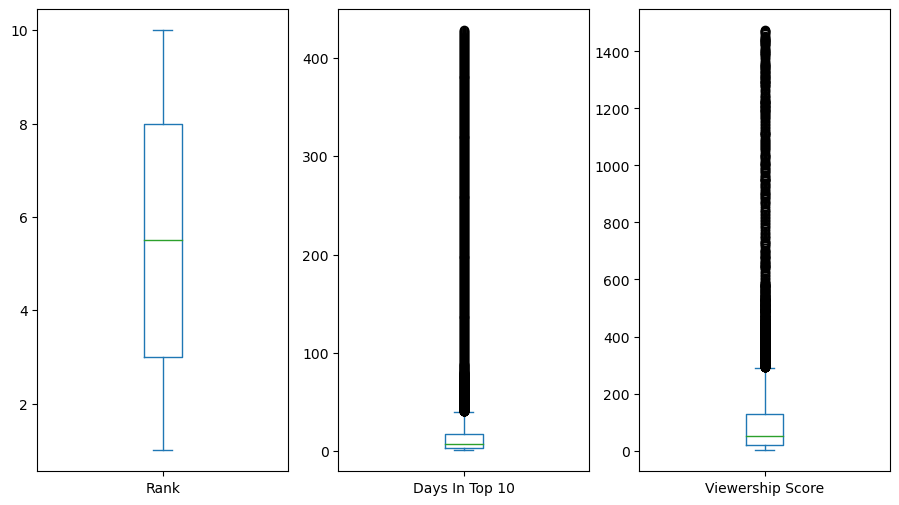

In [22]:
base.plot(kind='box',figsize=(11,6),subplots=True);

##### 1.6.1.1 Outliers Days In Top 10 

In [11]:
base[base['Days In Top 10'] >= 40.5]

,As of,Rank,Previous Day's Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
438,2020-05-14,9,9,-,Ozark,TV Show,Yes,"Jul 21, 2017",41,256
447,2020-05-15,8,9,10,Ozark,TV Show,Yes,"Jul 21, 2017",42,259
458,2020-05-16,9,8,-,Ozark,TV Show,Yes,"Jul 21, 2017",43,261
489,2020-05-19,10,-,7,Ozark,TV Show,Yes,"Jul 21, 2017",44,262
629,2020-06-02,10,-,-,Outer Banks,TV Show,Yes,"Apr 15, 2020",41,291
...,...,...,...,...,...,...,...,...,...,...
7053,2022-03-07,4,3,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",42,288
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",45,306


#### 1.6.1.2 Outliers Viewership Score 

In [12]:
base[base['Viewership Score'] >= 291.5]

,As of,Rank,Previous Day's Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
236,2020-04-24,7,7,2,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",32,292
247,2020-04-25,8,7,2,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",33,295
255,2020-04-26,6,8,3,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",34,300
269,2020-04-27,10,6,4,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",35,301
2382,2020-11-25,3,2,3,The Queenâs Gambit,TV Show,Yes,"Oct 23, 2020",33,296
...,...,...,...,...,...,...,...,...,...,...
7008,2022-03-02,9,6,3,Sweet Magnolias,TV Show,Yes,"May 19, 2020",45,344
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",45,306


### 1.6.2 How many times do films appear in the top 10

In [13]:
base.Title.value_counts()

Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: Title, Length: 645, dtype: int64

### 1.6.3 Number of records per type of program

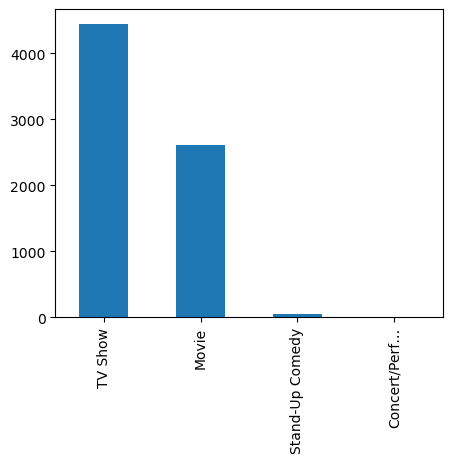

In [14]:
base.Type.value_counts().plot(kind='bar', figsize=(5,4));

### 1.6.4 Number of record per Viewership Score

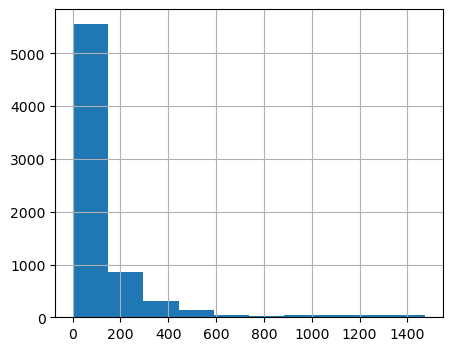

In [15]:
base['Viewership Score'].hist(figsize=(5,4));

### 1.6.5 Maximum Viewership Score

In [16]:
base[base['Viewership Score'] == base['Viewership Score'].max()]

,As of,Rank,Previous Day's Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",428,1474
